<center>

*******************************************************************************************

### Rho

##### 7 May 2025

##### Juan Ignacio Mendoza Garay

*******************************************************************************************

</center>

##### INFORMATION:

* *Rho* is a measure of group synchrony.
>
* Tested with:
    * Python 3.11
    * Windows 11
    * [multiSyncPy](https://pypi.org/project/multiSyncPy/)
>
* References:
    * Frank, T. D., & Richardson, M. J. (2010). On a test statistic for the Kuramoto order parameter of synchronization: An illustration for group synchronization during rocking chairs. *Physica D: Nonlinear Phenomena, 239*(23-24), 2084-2092. https://doi.org/10.1016/j.physd.2010.07.015
    * Richardson, M. J., Garcia, R. L., Frank, T. D., Gergor, M., & Marsh, K. L. (2012). Measuring group synchrony: a cluster-phase method for analyzing multivariate movement time-series. *Frontiers in physiology, 3*, 405. https://doi.org/10.3389/fphys.2012.00405
    * https://github.com/cslab-hub/multiSyncPy
>
* Instructions:
    * Edit the values indicated with an arrow like this: <---

*******************************************************************************************

In [1]:
import sys
import numpy as np

sys.path.append(r"../src")
import syncoord as sc

***
### Generate synthetic data

index; key; Name; duration (s):
  0; 0; Test Data; 0:16.0


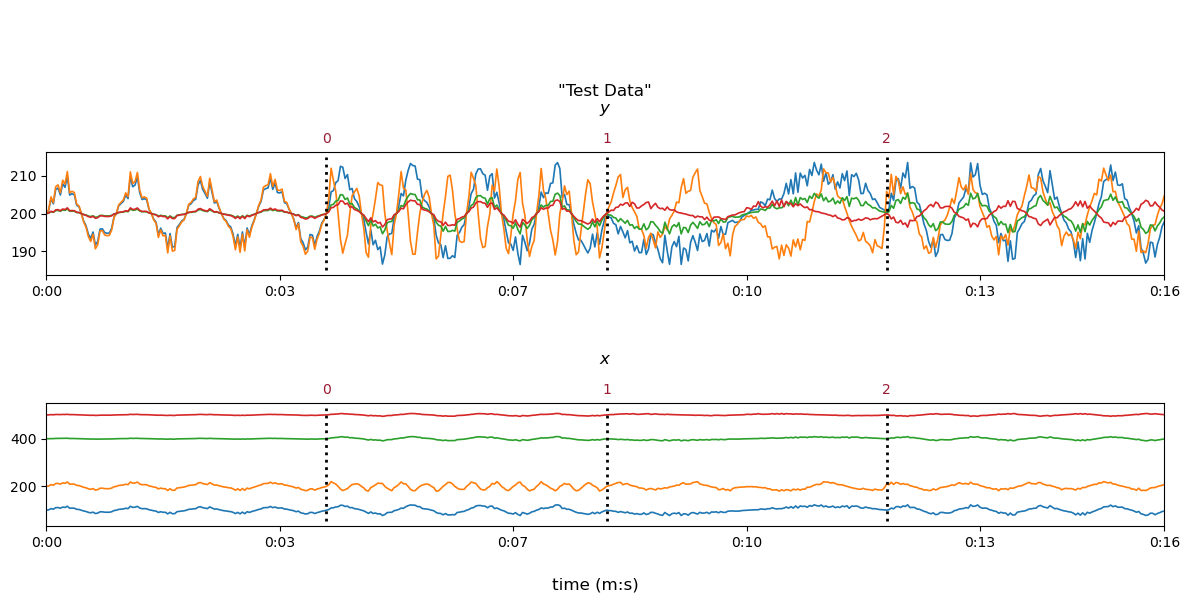

In [2]:
test_data_1 = sc.ptdata.load( 'make', seed=1, print_info=True )
test_data_1.visualise( vscale=1.2, dlattr='1.2' )

***
### Low-Pass Filter

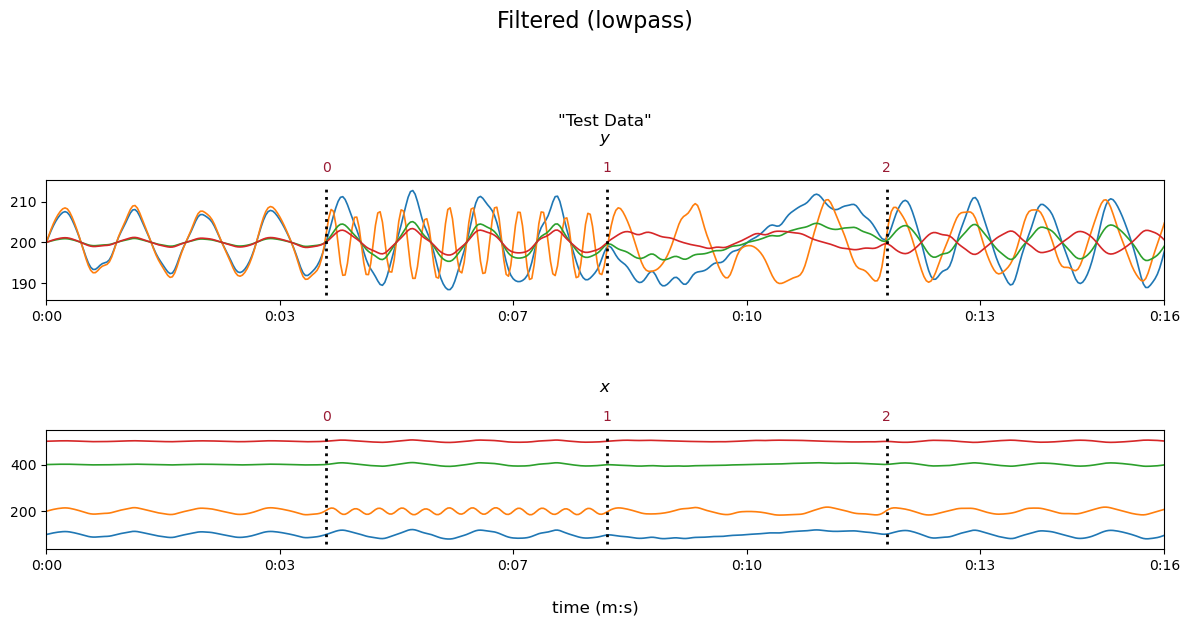

In [3]:
apply_LPF = True # <---

filter_type = 'butter'
filter_freq_response = 'lowpass'
filter_cutoff_freq = 4 # <--- (Hz)
filter_order = 3       # <---

if apply_LPF:
    test_data_2 = sc.ptdata.smooth( test_data_1, filter_type=filter_type,
                                   freq_response=filter_freq_response,
                                   cutoff_freq=filter_cutoff_freq, order=filter_order )
    test_data_2.visualise( vscale=1.2, dlattr='1.2'  )
else:
    test_data_2 = test_data_1
    print('Filter not applied.')

***
### Speed

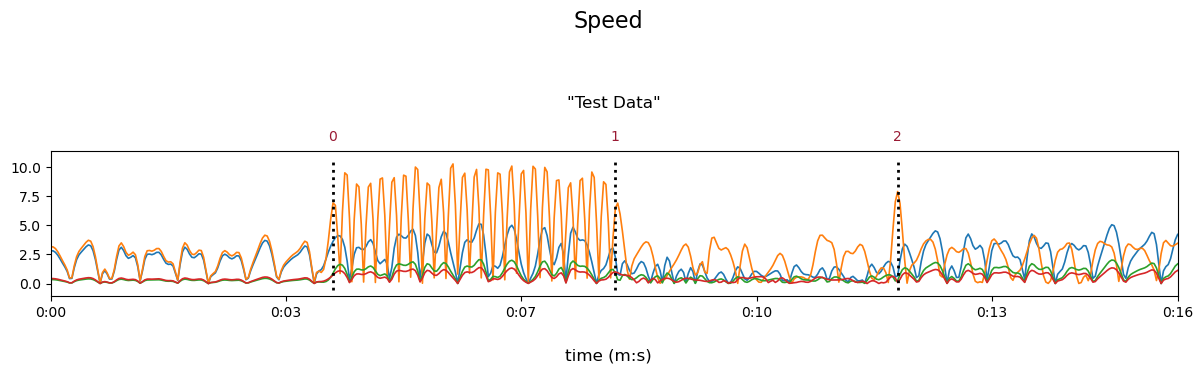

In [4]:
speed = sc.ptdata.apply( test_data_2, sc.ndarr.tder2D )
speed.visualise( vscale=1.4, dlattr='1.2' )

***
### Phase

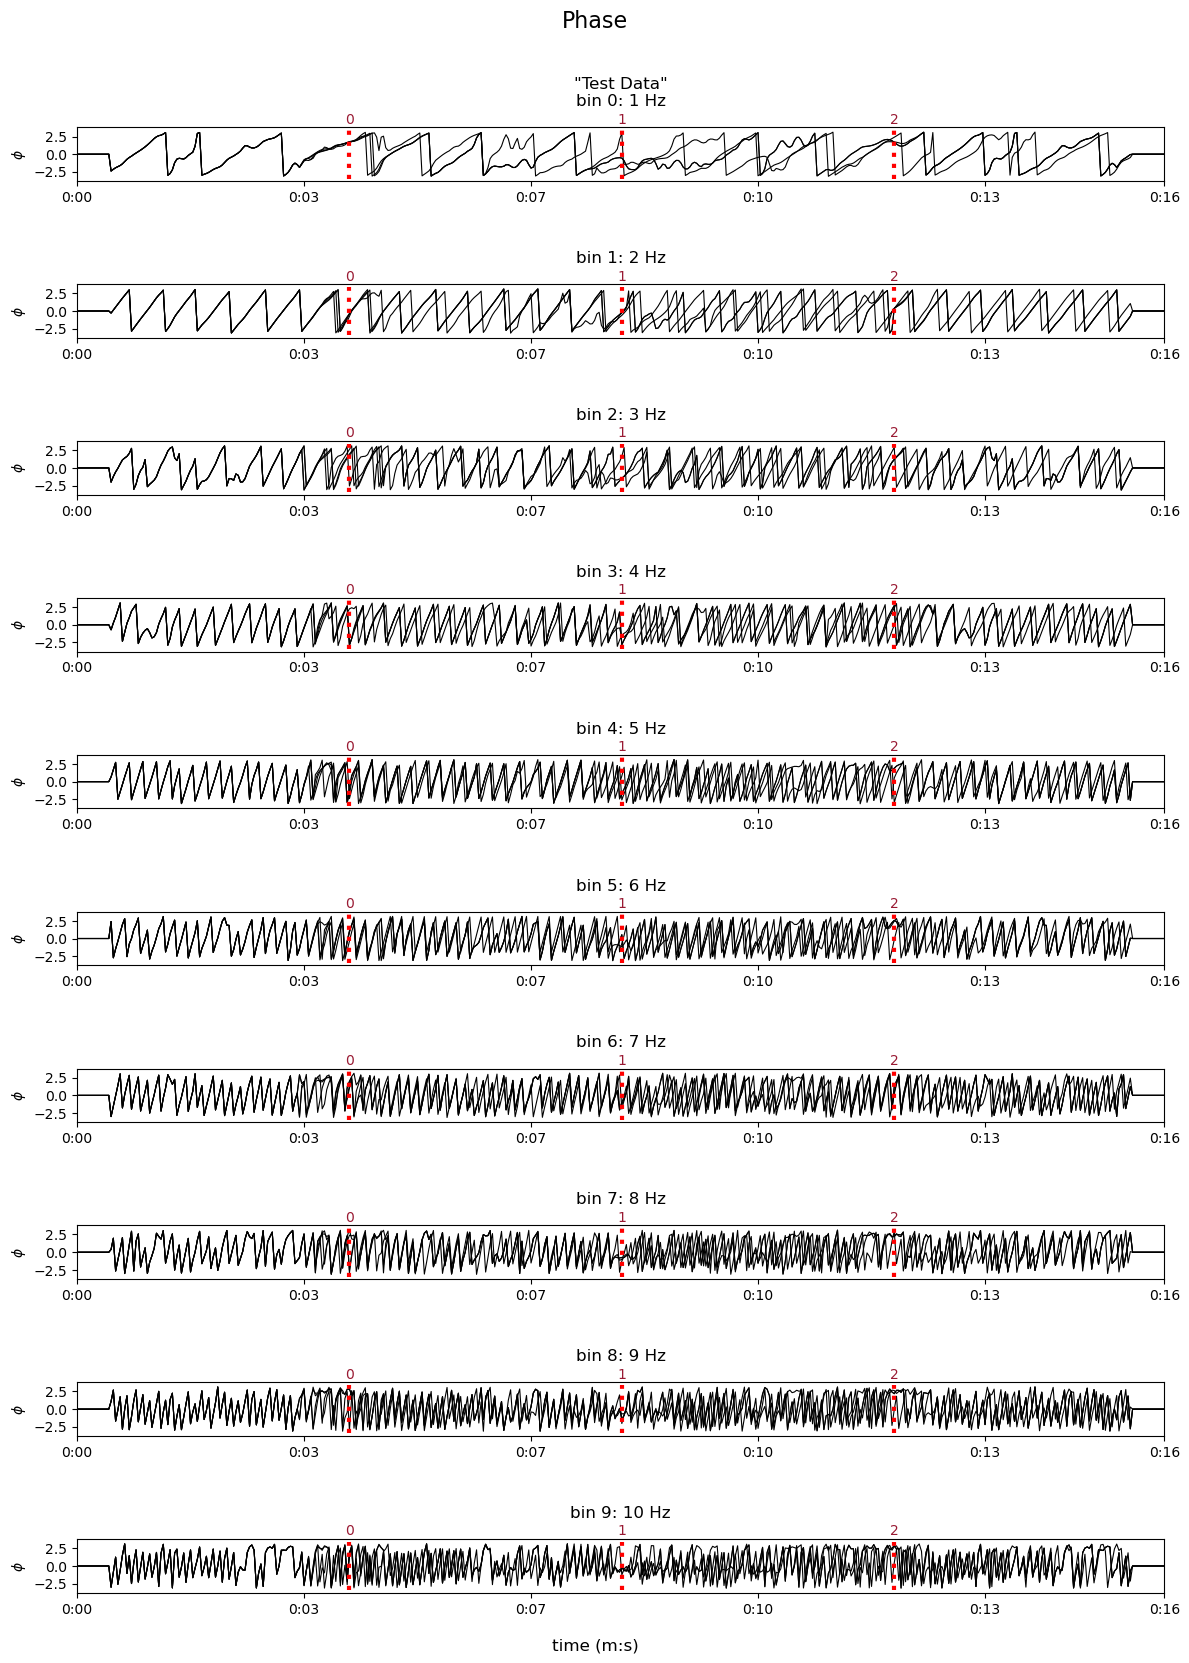

In [5]:
fft_window_s = 1           # <--- FFT window's length (seconds)
sel_freq_bin = slice(0,10) # <--- select frequency bins (int, slice, or 'all')

fft_phase = sc.ptdata.fourier( speed, fft_window_s, output='phase' )
if sel_freq_bin == 'all':
    fft_phase.visualise( vscale=0.7 )
else:
    fft_phase = sc.ptdata.select(fft_phase,frequency=sel_freq_bin)
    if isinstance(sel_freq_bin,slice): fft_phase.visualise( vscale=0.7 )
    else: fft_phase.visualise( vscale=1.3 )

***
### Multiband Rho

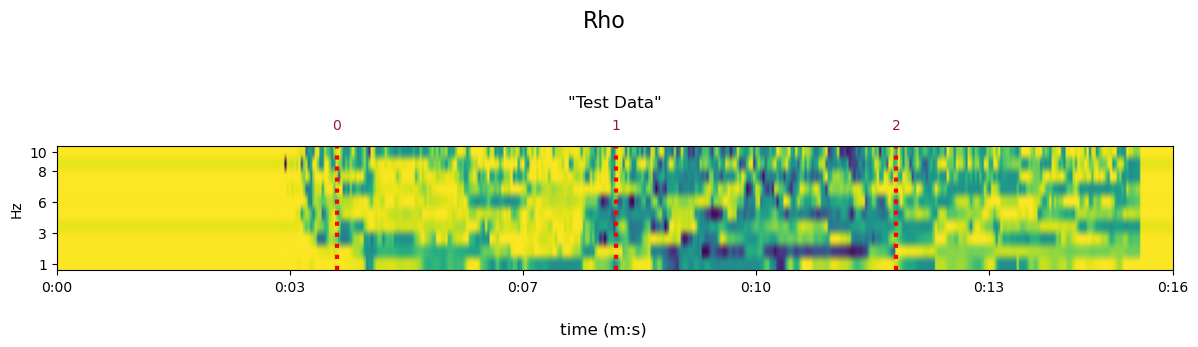

In [6]:
rho = sc.ptdata.rho( fft_phase )
rho.visualise(vscale=1.3)

>
#### Group average

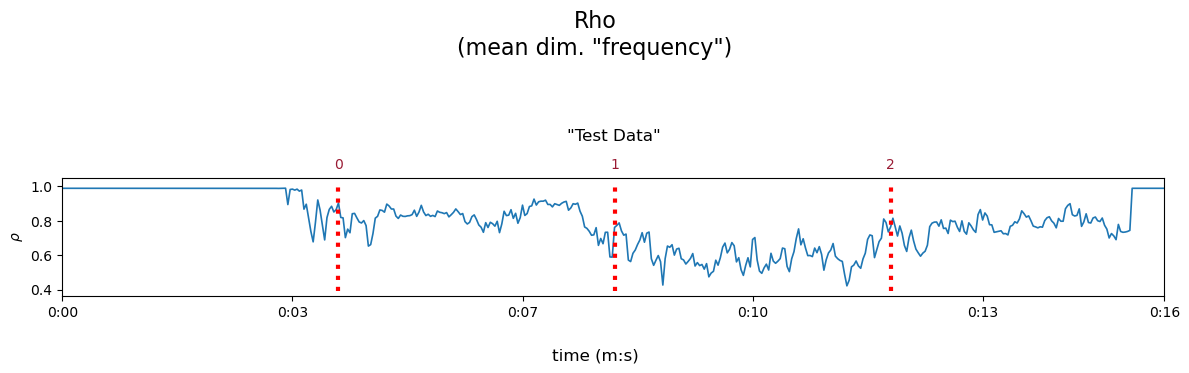

In [7]:
if isinstance(sel_freq_bin,int):
    rho_aggr  = rho
    print('Process does not apply.')
else:
    rho_aggr = sc.ptdata.aggrax( rho, axis=0, function='mean' )
    rho_aggr.visualise( vscale=1.3, vistype='line', dlattr='1.2' )

>
#### Sections' statistics

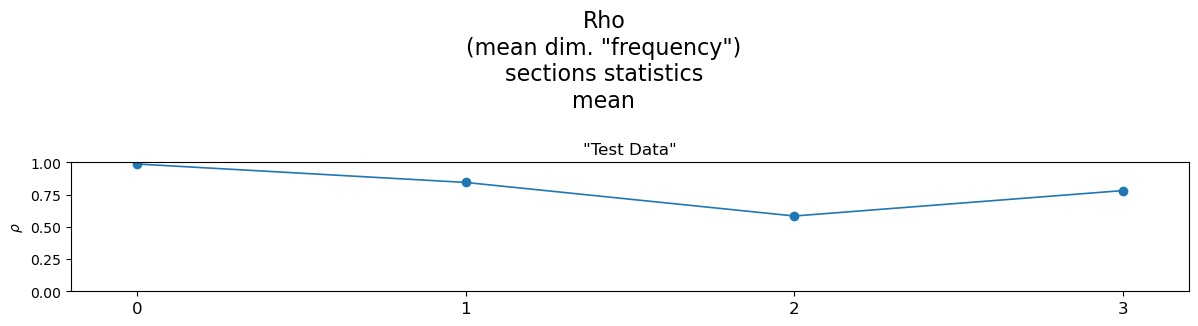

In [8]:

sec_margins = [[0.5,0.5] for _ in range(4)] # <--- sections' margins (seconds)

rho_aggr_stats = sc.ptdata.secstats( rho_aggr, margins=sec_margins, last=True )
rho_aggr_stats.visualise( statistics='mean' )

import matplotlib.pyplot as plt
plt.ylim((0,1))
plt.xlim((-0.2,3.2))
plt.xticks((0,1,2,3),('0','1','2','3'),fontsize=12);